In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,RandomForestClassifier
import warnings

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "earthquake_alert_balanced_dataset.csv"

# Load the latest version
df =pd.read_csv(file_path)
df = df.drop_duplicates(keep='first').reset_index(drop=True)

print("First 5 records:", df.head())

First 5 records:    magnitude  depth  cdi  mmi   sig  alert
0        7.0   14.0  8.0  7.0   0.0  green
1        6.9   25.0  4.0  4.0 -33.0  green
2        7.0  579.0  3.0  3.0 -13.0  green
3        7.3   37.0  5.0  5.0  65.0  green
4        6.6  624.0  0.0  2.0 -98.0  green


f:\projects\ML algorithms 2025\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df.describe()

magnitude        depth          cdi          mmi          sig
count  1256.000000  1256.000000  1256.000000  1256.000000  1256.000000
mean      7.060796    51.316879     6.960191     6.917994   -10.404459
std       0.423277   105.899870     2.245138     1.363892    62.370941
min       6.500000     2.000000     0.000000     1.000000  -128.000000
25%       6.710000    12.000000     6.000000     6.000000   -55.000000
50%       6.995000    19.000000     8.000000     7.000000    -8.000000
75%       7.300000    38.000000     8.000000     8.000000    31.000000
max       8.600000   670.000000     9.000000     9.000000   127.000000

In [4]:
df['alert']=df['alert'].map({'green':0,'yellow':1,'orange':2,'red':3})

<BarContainer object of 4 artists>

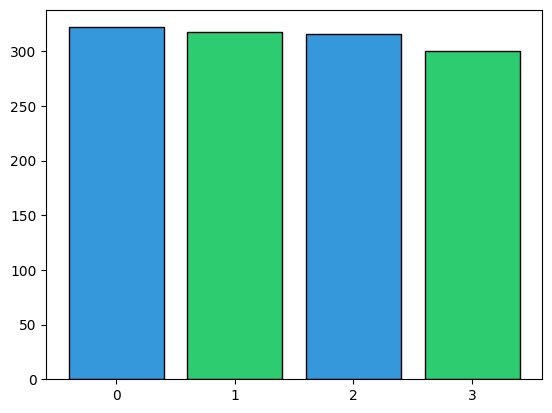

In [5]:
X = df.drop('alert', axis=1)
y = df['alert']


counts = y.value_counts()

plt.bar(counts.index.astype(str), counts.values, color=['#3498db', '#2ecc71'], edgecolor='black')

In [6]:
cols = df.columns
cols

Index(['magnitude', 'depth', 'cdi', 'mmi', 'sig', 'alert'], dtype='object')

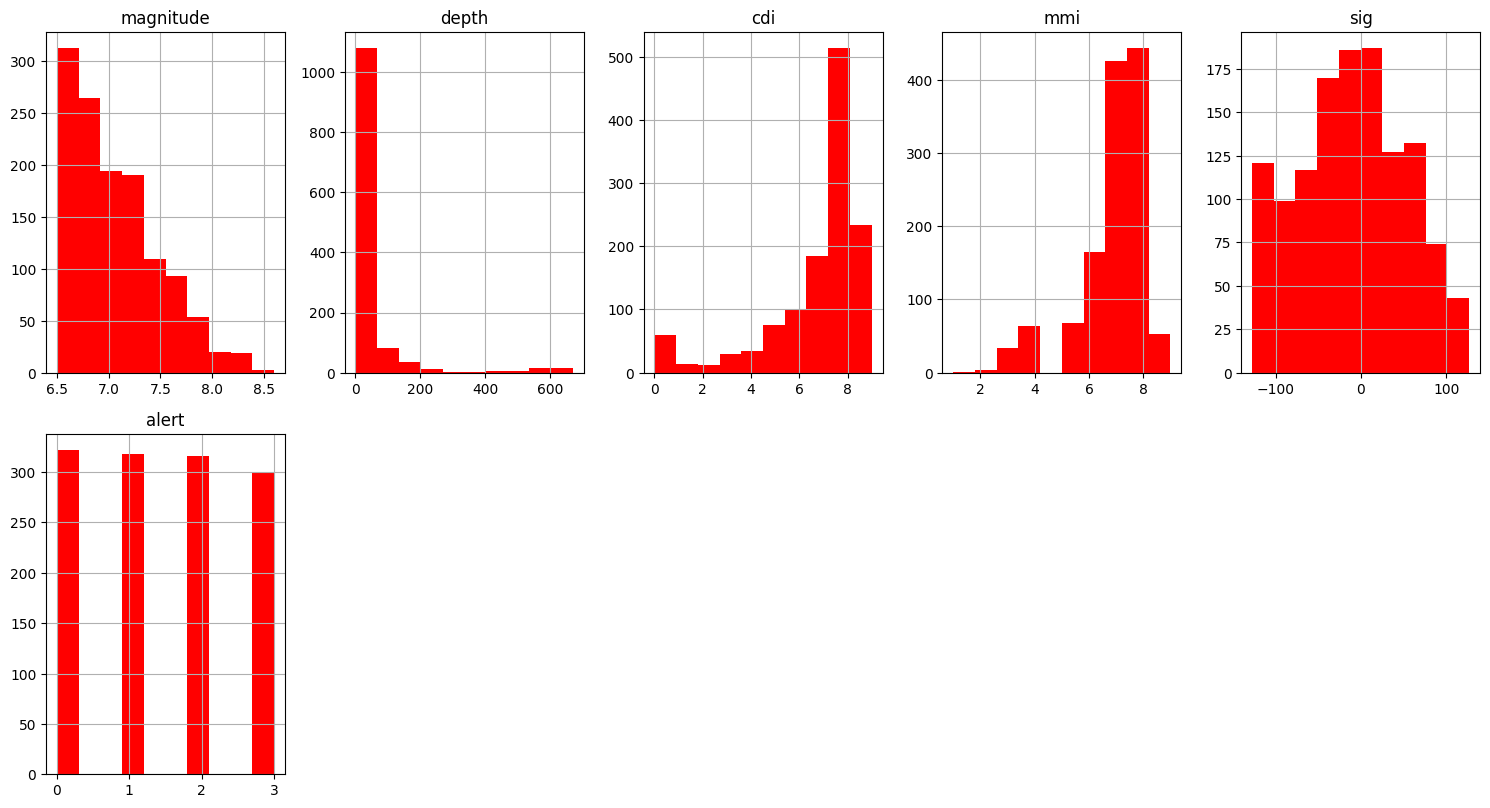

In [7]:
fig,axes = plt.subplots(5,5,figsize=(15,20))
axes = axes.flatten()

for i,col in enumerate(cols):
    axes[i].hist(df[col],color="red")
    axes[i].set_title(col)
    axes[i].grid(True)
for j in range(len(cols),len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

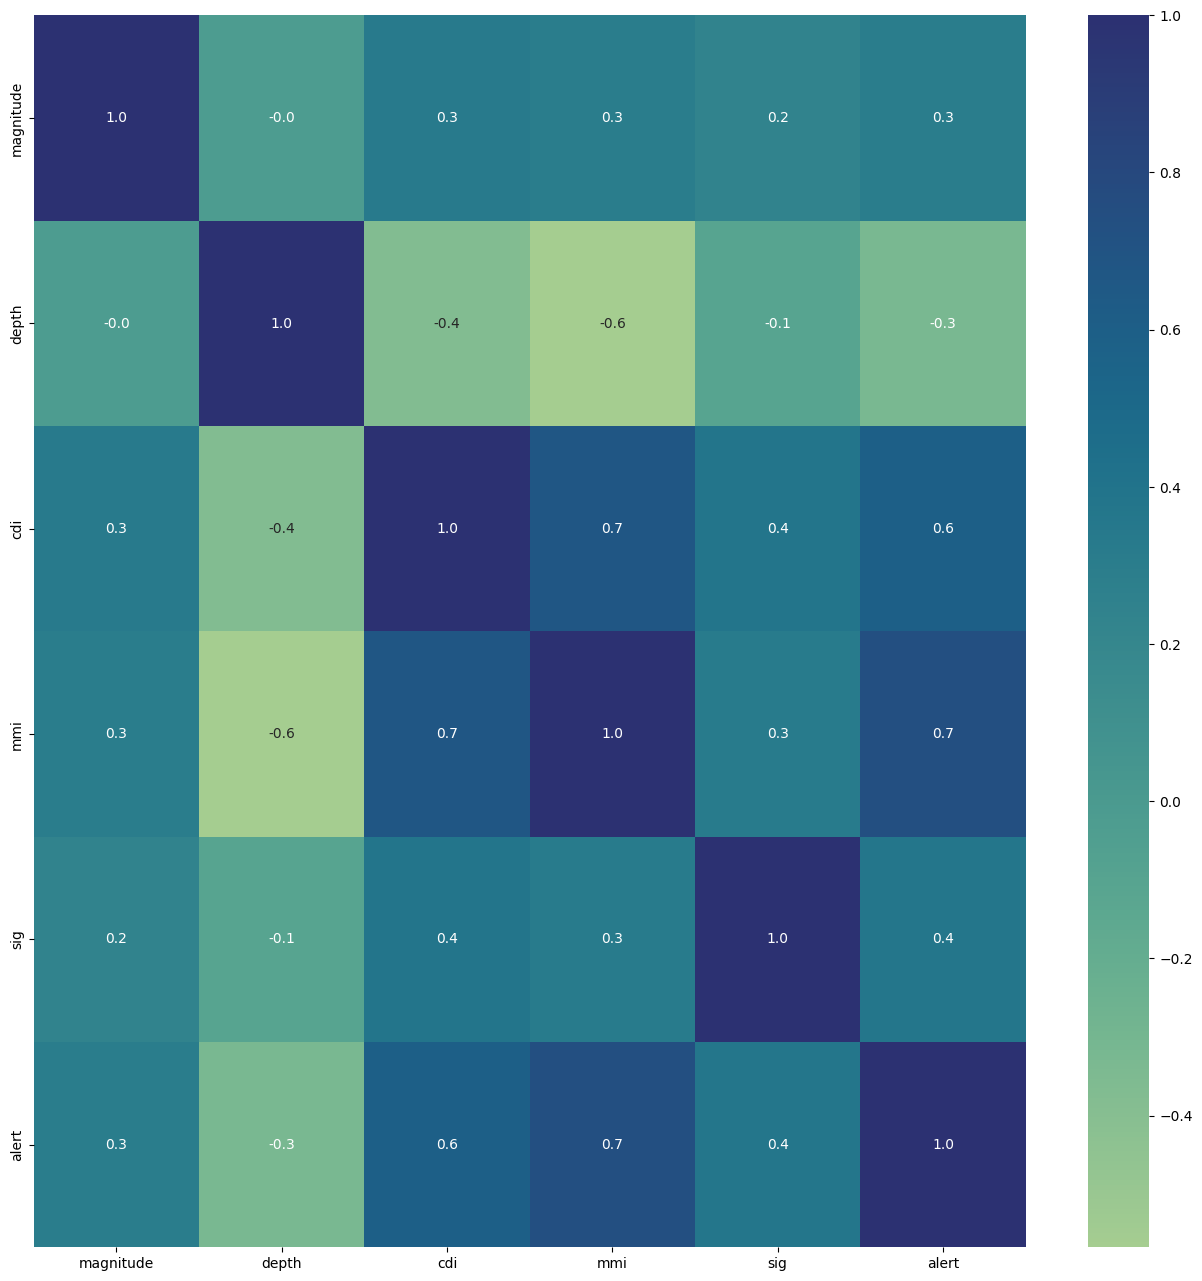

In [8]:
train_corr = df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(train_corr,annot=True,cmap='crest',fmt='.1f')
plt.show()

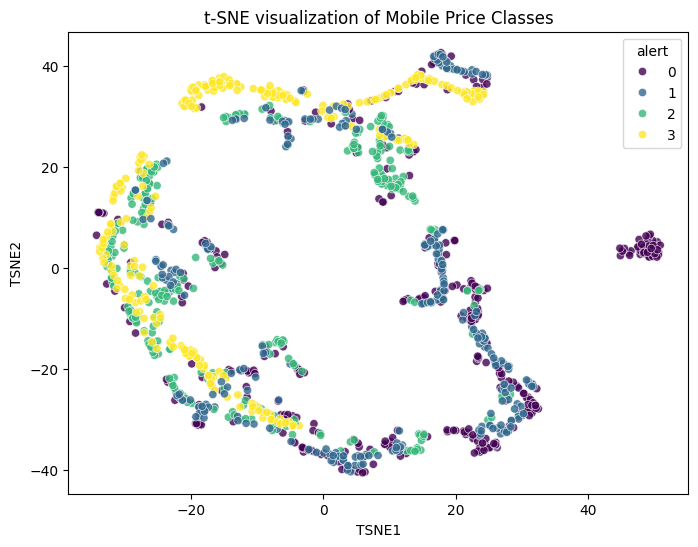

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# t-SNE с 2 компонентами
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_embedded = tsne.fit_transform(X)

# Переводим в DataFrame
df_tsne = pd.DataFrame(X_embedded, columns=["TSNE1", "TSNE2"])
df_tsne["alert"] = y

# Визуализация
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_tsne, 
    x="TSNE1", 
    y="TSNE2", 
    hue="alert", 
    palette="viridis", 
    alpha=0.8
)
plt.title("t-SNE visualization of Mobile Price Classes")
plt.show()



In [10]:
num_duplicates = df.duplicated().sum()
num_duplicates

np.int64(0)

In [11]:
has_duplicates = df.duplicated().any()
print("Есть дубликаты?" , has_duplicates)


Есть дубликаты? False


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train,y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)




knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2, )
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
from classifier.KnnClassifier import KnnClassifier


knn2 = KnnClassifier(ord = 2, k=5, weights ="uniform")

knn2.fit(X_train, y_train.values)

0.8530973451327434
0.8584070796460177
0.856637168141593
0.8451327433628318
0.8451327433628318
0.8398230088495575
0.8407079646017699
0.831858407079646


In [15]:
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Validation Accuracy: {knn_accuracy:.4f}")

KNN Validation Accuracy: 0.8968


In [16]:
knn2.k


3

In [32]:
a = knn2.predict(X_test)
count=0
for a,b in zip(a, y_test):
    if a==b:
        count+=1
count/len(y_test)


0.9206349206349206

In [ ]:
X_trainp

array([  11,   15,   17, ..., 1127, 1128, 1129], shape=(1047,))

Пробуем удалить 1129: CCV=110590.0460188
8
Удалили 0, осталось 1129, CCV=108899.544248
Удалили 9, осталось 1128, CCV=108899.544248
Удалили 45, осталось 1127, CCV=108899.544248
Удалили 84, осталось 1126, CCV=108899.544248
Удалили 91, осталось 1125, CCV=108899.544248
Удалили 100, осталось 1124, CCV=108899.544248
Удалили 856, осталось 1123, CCV=108899.544248
Удалили 899, осталось 1122, CCV=108899.544248
Пробуем удалить 1129: CCV=103264.5380537
7
Удалили 1, осталось 1121, CCV=102136.538053
Удалили 22, осталось 1120, CCV=102136.538053
Удалили 52, осталось 1119, CCV=102136.538053
Удалили 81, осталось 1118, CCV=102136.538053
Удалили 149, осталось 1117, CCV=102136.538053
Удалили 378, осталось 1116, CCV=102136.538053
Удалили 390, осталось 1115, CCV=102136.538053
Пробуем удалить 1129: CCV=99881.5371688
8
Удалили 2, осталось 1114, CCV=98754.536283
Удалили 3, осталось 1113, CCV=98754.536283
Удалили 54, осталось 1112, CCV=98754.536283
Удалили 71, осталось 1111, CCV=98754.536283
Удалили 80, осталось

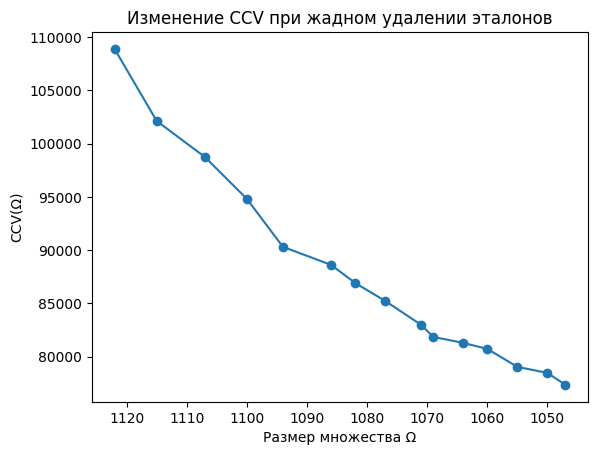

In [18]:
from selector.selector import Selector
selector = Selector(X_train, y_train, verbose=True, k=3)
omega = selector.select()
selector.plot_history()

In [24]:
y_train = np.array(y_train)

In [35]:
for i in omega:
    print(i, end=", ")

11, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 74, 75, 76, 77, 78, 79, 82, 83, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 208, 209, 210, 211, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,

In [ ]:
X_train_selected = X_train[omega]
y_train_selected = y_train[omega]

In [33]:
knn2 = KnnClassifier(ord = 2, k=5, weights ="kernel")

knn2.fit(X_train_selected, y_train_selected)

0.9044890162368673
0.9025787965616046
0.8968481375358166
0.8930276981852913
0.8930276981852913
0.8911174785100286
0.889207258834766
0.8825214899713467
